# Chapter 12: Classification with Support Vector Machine

本章探讨如何用 SVM 做二元分类。 

用 SVM 做二元分类的原因有两个：
1. 可以从用几何的角度思考监督学习
2. SVM 的优化不是很依赖各种优化工具得到 analytical solution

**本章主要内容**：
* margin 的概念
* 两种种构建 SVM 的方法
    * Geometric view
    * Loss function view
* SVM 对偶
* kernel的概念 以及怎么解决 非线性 kernel-SVM 优化问题

## 12.1 Separating Hyperplanes

分类的主要思想就是在一个向量空间 $\mathbb{R}^D$ 中表示数据， 然后分割这个空间， 理想情况就是标签相同的数据被分在一个区域中。 在二元分割中， 我们使用超平面把向量空间分割成两部分。 

假设有$x\in \mathbb{R}^D$ 和函数：

$$
\begin{array}{l}
f: \mathbb{R}^{D} \rightarrow \mathbb{R} \\
x \mapsto f(x):=\langle w, x\rangle+b
\end{array}
$$

其中， $w\in\mathbb{R}^D, b\in \mathbb{R}$ 是参数。 

超平面其实就是 affine subspace， 针对我们的二元分类问题， 定义如下超平面：

$$\{x\in\mathbb{R^D}: f(x)=0\}$$

可以证明 $w$ 其实就是超平面的一个法向量：

选取超平面上两点 $x_a, x_b$， 因为这两点在超平面上， 所以我们有： $f(x_a) = 0, f(x_b) = 0$

那么 $f(x_a) - f(x_b)$ 有：

$$
\begin{aligned}
f\left(x_{a}\right)-f\left(x_{b}\right) &=\left\langle w, x_{a}\right\rangle+b-\left(\left\langle w, x_{b}\right\rangle+b\right) \\
&=\left\langle w, x_{a}-x_{b}\right\rangle = 0
\end{aligned}
$$

所以 $w$ 和超平面上任意向量垂直。 

超平面也确定了 positive side 和 negative side， 给定一个测试数据 $x_\mathrm{test}$, 我们计算 $f(x_\mathrm{test})$ 的值， 如果 $f(x_\mathrm{test}) \ge 0$, 那 $x_\mathrm{test}$ 被标记为 $+1$，否则 $x_\mathrm{test}$ 被标记为 $-1$。 

在训练阶段， 我们希望：

$$
\begin{aligned}
如果 y_n = +1: \left\langle w, x_{a}\right\rangle+b \ge 0\\
如果 y_n = -1: \left\langle w, x_{a}\right\rangle+b < 0
\end{aligned}
$$

把上述两个式子合成一个就是：

$$
y_n\left (\left\langle w, x_{a}\right\rangle+b \right) \ge 0
$$

## 12.2 Primal Support Vector Machine

在给定数据集 $\{(x_1, y_1), ..., (x_N, y_N)\}$ 的情况下（假设可以被线性分开）， 我们有无数多个超平面可以把这些数据分开， 参考下图：

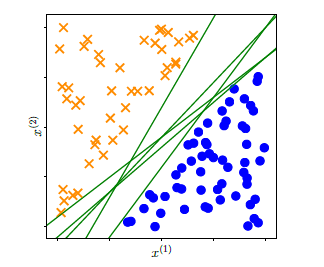

怎么找到最合适的超平面呢？ 

我们可以最大化超平面距离 positive examples 和 negative examples 的 margin。因为 margin 越大， 分类器泛化地越好。 

下面介绍什么是 margin！

### 12.2.1 Concept of Margin

Margin 的定义： 超平面与数据集中最近的数据点的距离。 

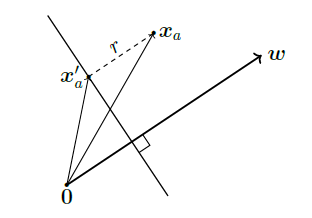

假设有数据点 $x_a$ 是与超平面距离最近的点且在超平面 positive side， 即 $\left (\left\langle w, x_{a}\right\rangle+b \right) > 0$。 我们想求 $x_a$ 与超平面的距离 $r>0$。 通过把 $x_a$ 投影至超平面得到 $x^{'}_a$, 因为 $w$ 是垂直于超平面的， 那么 $r$ 应该是 $w$ 的一个比例系数。我们可以把 $x_a$ 写为：

$$x_a = x^{'}_a + r \frac{w}{\|w\|}$$

离超平面最近的点与超平面的距离都是 $r$, 那么其他 positive examples 和 negative examples 与超平面的距离都应该不小于 $r$， 则有：

$$
y_{n}\left(\left\langle w, x_{n}\right\rangle+b\right) \geqslant r
$$

因为我们只对 $w$ 的方向感兴趣， 所以我们假设 $\|w\|=1$, 即 $w$ 是单位向量。 那么我们的问题可以定义如下：

$$
\begin{array}{ll}
\max _{w, b, r} & \underbrace{r}_{\text {margin }} \\
\text { subject to } & \underbrace{y_{n}\left(\left\langle w, x_{n}\right\rangle+b\right) \geqslant r}_{\text {data fitting }}, \underbrace{\|w\|=1}_{\text {normalization }}, \quad r>0,
\end{array}
$$

个人理解：
* 上式 data fitting 部分表示的是， 在保证数据都被正确地分在超平面两侧的条件下（本来条件是： $y_{n}\left(\left\langle w, x_{n}\right\rangle+b\right) \geqslant 0$）， 最大化 $r$， 使数据与超平面的距离不小于 $r$。 

### 12.2.2 Traditional Derivation of the Margin

传统方法是从另一种角度来定义问题的： 改变数据scale 使 $\left(\left\langle w, x_{a}\right\rangle+b\right)=1$。 这里的 $x_a$ 是数据集中距离超平面最近的点。 也就是说最近的点都离超平面 1 了， 那么其他的点肯定与超平面的距离肯定也要大于 1 了。

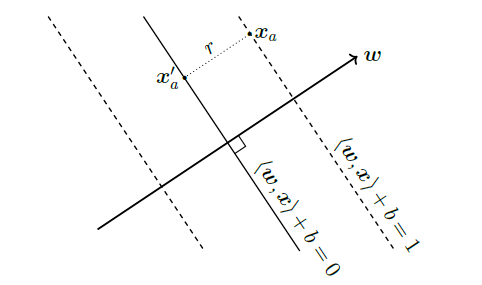

同样地， 我们通过把 $x_a$ 投影至超平面得到 $x^{'}_a$， 则有：

$$
\left\langle w, x^{'}_{a}\right\rangle+b = 0
$$

把 $ x^{'}_{a} = x_a - r \frac{w}{\|w\|} $ 带入上式有：

$$
\left\langle w, x_{a}\right\rangle+b-r \frac{\langle w, w \rangle}{\| w \|}=0
$$

又因为 $\left(\left\langle w, x_{a}\right\rangle+b\right)=1，\left\langle w, w\right\rangle = \|w\|^2$, 整理上式可得：

$$r=\frac{1}{\|w\|}$$

我们想要最大化 margin， 而且还需要满足所有点与超平面的距离大于1的条件， 那么我们的问题可以定义如下：

$$
\begin{aligned}
&\max _{w, b} \space \frac{1}{\|w\|}\\
&\text { subject to }\space  y_{n}\left(\left\langle w, x_{n}\right\rangle+b\right) \geqslant 1 \quad \text { for all } \quad n=1, \ldots, N
\end{aligned}
$$


但是为了计算方便， 我们通常把目标函数化为以下形式：

$$
\begin{aligned}
&\min _{w, b} \space \frac{1}{2}\|w\|^{2}\\
&\text { subject to } y_{n} \space \left(\left\langle w, x_{n}\right\rangle+b\right) \geqslant 1 \quad \text { for all } \quad n=1, \ldots, N
\end{aligned}
$$

上面的定义被称为 `hard margin SVM`, 是因为不允许有违背 margin 条件的情况发生。 当数据不能被线性分割时， 我们就需要 relax 这个条件。 

### 12.2.3 Why We Can Set the Margin to 1?

12.2.1 的方法： 最大化 $r$， 这里的 $r$ 代表了最近的数据点与超平面的距离

$$
\begin{array}{ll}
\max _{w, b, r} & \underbrace{r}_{\text {margin }} \\
\text { subject to } & \underbrace{y_{n}\left(\left\langle w, x_{n}\right\rangle+b\right) \geqslant r}_{\text {data fitting }}, \underbrace{\|w\|=1}_{\text {normalization }}, \quad r>0,
\end{array}
$$

12.2.2 的方法： 改变数据scale， 使最近的数据点与超平面的距离为 1

$$
\begin{array}{cl}
\min _{w, b} &\space \frac{1}{2}\|w\|^{2}\\
\text { subject to } &y_{n} \space \left(\left\langle w, x_{n}\right\rangle+b\right) \geqslant 1 \quad \text { for all } \quad n=1, \ldots, N
\end{array}
$$

本子节来说明为什么前两子节的推导方法是一致的。 下面是证明过程：

我们可以把 12.2.1 方法中的目标函数化为 $r^2$ 然后 把 $w$ 替换为 $\frac{w^{'}}{\|w^{'}\|}$:

$$
\begin{array}{cl}
\max _{w^{\prime}, b, r} & r^{2} \\
\text { subject to } & y_{n}\left(\left\langle\frac{w^{\prime}}{\left\|w^{\prime}\right\|}, x_{n}\right\rangle+b\right) \geqslant r, \quad r>0
\end{array}
$$

对约束条件两边同时除以$r$:


$$
\begin{array}{cl}
\max _{w^{\prime}, b, r} &\quad r^{2} \\
\text { subject to } &y_{n}(\underbrace{\frac{w^{\prime}}{\left\|w^{\prime}\right\| r}, x_{n}}_{w^{\prime \prime}}\rangle+\underbrace{\frac{b}{r}}_{b^{\prime \prime}}) \geqslant 1, \quad r>0
\end{array}
$$

因为 $w^{\prime\prime} = \frac{w^{\prime}}{\left\|w^{\prime}\right\| r}$, 所以：

$$
\left\|w^{\prime \prime}\right\|=\left\|\frac{w^{\prime}}{\left\|w^{\prime}\right\| r}\right\|=\frac{1}{r} \cdot\left\|\frac{w^{\prime}}{\left\|\boldsymbol{w}^{\prime}\right\|}\right\|=\frac{1}{r} .
$$

把目标函数替换掉可得：

$$
\begin{array}{cl}
\max _{w^{\prime \prime}, b^{\prime \prime}} & \frac{1}{\left\|w^{\prime \prime}\right\|^{2}} \\
\text { subject to } & y_{n}\left(\left\langle w^{\prime \prime}, x_{n}\right\rangle+b^{\prime \prime}\right) \geqslant 1
\end{array}
$$

最大化 $\frac{1}{\left\|w^{\prime \prime}\right\|^{2}}$ 与 最小化 $\frac{1}{2}\left\|w^{\prime \prime}\right\|^{2}$ 有一样的解， 这样我们就完成了证明。 

### 12.2.4 Soft Margin SVM: Geometric View

前面我们考虑的都是数据可以被线性分开的情况， 但是如果数据不可以被线性分开呢？ 我们就需要允许一些数据点落在 margin 区域甚至落在了错误的一边， 如下图所示。 

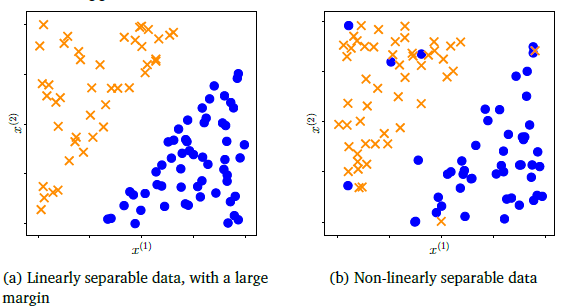

像这种允许分类误差的 SVM 我们叫做 soft margin SVM。 从几何角度来说， 我们为每个数据对 $(x_n, y_n)$ 引入 slack variable $\xi_{n}$, 来允许特定的数据落入 margin 区域甚至落在超平面错误的一边。 

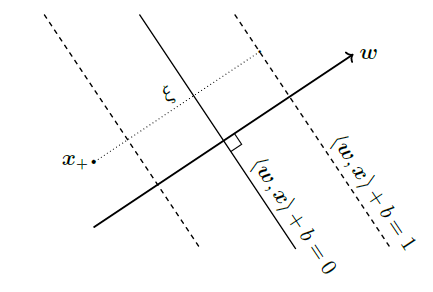

这样 soft margin SVM 就可以定义为：

$$
\begin{array}{cl}
\min _{w, b, \xi} & \frac{1}{2}\|w\|^{2}+C \sum_{n=1}^{N} \xi_{n} \\
\text { subject to } & y_{n}\left(\left\langle w, x_{n}\right\rangle+b\right) \geqslant 1-\xi_{n} \\
& \xi_{n} \geqslant 0
\end{array}
$$


### 12.2.5 Soft Margin SVM: Loss Function View

本子节用 loss function 的角度构建 soft margin SVM 模型。 

SVM 的核心问题就是找到一个超平面 $f(x) = \langle w, x \rangle+ b$ 来分割数据。 但是怎么定义 loss function 帮助我们找到一个合适的超平面呢？ 

zero-one loss： $1(f(x_n) \neq y_n)$ 
* 但是会把寻找最优参数 $w, b$ 的问题转化为一个组合优化问题， 不好解

我们用 hinge loss 来作为 SVM 的loss function:

$$
\ell(t)=\left\{\begin{array}{ll}
0 & \text { if } \quad t \geqslant 1 \\
1-t & \text { if } \quad t<1
\end{array}\right.
$$

其中， $t=yf(x) = y_{n}\left(\left\langle w, x\right\rangle+b\right) $

个人理解：
* 上面 loss 式子的含义是， 如果数据点被分在了正确的一边， 而且与超平面的距离超过1， 那说明这个数据点被分类地很好， loss 为0；如果数据点被分在了正确的一边， 但是与超平面距离小于1， 说明数据点差点就被分类错了（不够安全！）， 那就给点 loss； 如果数据点被分类错了， 那 loss 更大了。

给定数据集 $\{(x_1, y_1), ..., (x_N, y_N)\}$, 在使用 hinge loss 并且 引入 $\ell_2$ regularization 的情况下， 我们需要求解的优化问题如下：

$$
\min _{w, b} \underbrace{\frac{1}{2}\|\boldsymbol{w}\|^{2}}_{\text {regularizer }}+\underbrace{C \sum_{n=1}^{N} \max \left\{0,1-y_{n}\left(\left\langle w, x_{n}\right\rangle+b\right)\right\}}_{\text {error term }}
$$

优化问题
$$
\min _{t} \max \{0,1-t\}
$$

与下面优化问题想同：

$$
\begin{aligned}
\min _{\xi, t} & \space \xi \\
\text { subject to } & \xi \geqslant 0, \quad \xi \geqslant 1-t
\end{aligned}
$$

根据上面的结论， 我们可以推导出与上子节一样的优化问题。 

## 12.3 Dual Support Vector Machine

前面讨论的都是 primal SVM, 有个小问题：
* $w$ 的 维数与 $x$ 是一样的， 也就说参数 $w$ 的数量会随着数据 $x$ 的特征数的增加而线性增加。 

接下来我们讨论 Dual SVM：
* 参数的数量不随着 数据 $x$ 的特征数的增加而线性增加。 
* 参数的数量随着数据个数的增加而增加。 

这样在数据的特征数远大于数据个数时， dual SVM 模型会更有效率些。 

注：
* 我们在第十章 PCA 时也讨论了这个问题！ 

### 12.3.1 Convex Duality via Lagrange Multipliers

primal SVM 如下（Geometric view）：

$$
\begin{array}{cl}
\min _{w, b, \xi} & \frac{1}{2}\|w\|^{2}+C \sum_{n=1}^{N} \xi_{n} \\
\text { subject to } & y_{n}\left(\left\langle w, x_{n}\right\rangle+b\right) \geqslant 1-\xi_{n} \\
& \xi_{n} \geqslant 0
\end{array}
$$

把两个约束条件通过拉格朗日乘数法引入目标函数：

$$
\begin{aligned}
\mathfrak{L}(\boldsymbol{w}, b, \xi, \alpha, \gamma)=& \frac{1}{2}\|\boldsymbol{w}\|^{2}+C \sum_{n=1}^{N} \xi_{n} \\
&-\underbrace{\sum_{n=1}^{N} \alpha_{n}\left(y_{n}\left(\left\langle\boldsymbol{w}, \boldsymbol{x}_{n}\right\rangle+b\right)-1+\xi_{n}\right)}_{\text {constraint }(12.26 \mathrm{~b})} \underbrace{-\sum_{n=1}^{N} \gamma_{n} \xi_{n}}_{\text {constraint }(12.26 \mathrm{c})} .
\end{aligned}
$$

其中， $\alpha_n\ge 0, \gamma_n\ge 0$ 是拉格朗日乘数。 

对 Lagrangian 分别求 $w, b, \xi$ 的导数：

$$
\begin{aligned}
\frac{\partial \mathfrak{L}}{\partial w} &=w^{\top}-\sum_{n=1}^{N} \alpha_{n} y_{n} x_{n}^{\top} \\
\frac{\partial \mathfrak{L}}{\partial b} &=-\sum_{n=1}^{N} \alpha_{n} y_{n} \\
\frac{\partial \mathfrak{L}}{\partial \xi_{n}} &=C-\alpha_{n}-\gamma_{n}
\end{aligned}
$$

令导数为0 可得：

$$
\begin{aligned}
&w=\sum_{n=1}^{N} \alpha_{n} y_{n} x_{n} \\
&\sum_{n=1}^{N} \alpha_{n} y_{n} =0 \\
&C-\alpha_{n}-\gamma_{n} = 0\\
\end{aligned}
$$

注：
* 这样的结果算是 representer theorem 的例子： 最优的 $w$， 是 $x_n$ 的线性组合
* representer theorem: 最小化 empirical risk 的解在数据所确定的子空间中
* $C-\alpha_{n}-\gamma_{n} = 0$， 因为 $\gamma_n \ge 0$, 所以 $\alpha_i \le C$

把上式代入 Lagrangian， 可得 dual：

$$
\begin{aligned}
\mathfrak{D}(\xi, \alpha, \gamma)=& \frac{1}{2} \sum_{i=1}^{N} \sum_{j=1}^{N} y_{i} y_{j} \alpha_{i} \alpha_{j}\left\langle x_{i}, x_{j}\right\rangle-\sum_{i=1}^{N} y_{i} \alpha_{i}\left\langle\sum_{j=1}^{N} y_{j} \alpha_{j} x_{j}, x_{i}\right\rangle \\
&+C \sum_{i=1}^{N} \xi_{i}-b \sum_{i=1}^{N} y_{i} \alpha_{i}+\sum_{i=1}^{N} \alpha_{i}-\sum_{i=1}^{N} \alpha_{i} \xi_{i}-\sum_{i=1}^{N} \gamma_{i} \xi_{i} \\
& = -\frac{1}{2} \sum_{i=1}^{N} \sum_{j=1}^{N} y_{i} y_{j} \alpha_{i} \alpha_{j}\left\langle x_{i}, x_{j}\right\rangle+\sum_{i=1}^{N} \alpha_{i}+\sum_{i=1}^{N}\left(C-\alpha_{i}-\gamma_{i}\right) \xi_{i} \\
& = -\frac{1}{2} \sum_{i=1}^{N} \sum_{j=1}^{N} y_{i} y_{j} \alpha_{i} \alpha_{j}\left\langle x_{i}, x_{j}\right\rangle+\sum_{i=1}^{N} \alpha_{i}
\end{aligned}
$$

最终 dual SVM 定义如下 (dual改变了符号， 所以应该 minimize )：

\begin{array}{cl}
\min _{\alpha} &\frac{1}{2} \sum_{i=1}^{N} \sum_{j=1}^{N} y_{i} y_{j} \alpha_{i} \alpha_{j}\left\langle x_{i}, x_{j}\right\rangle-\sum_{i=1}^{N} \alpha_{i} \\
\text { subject to } &\quad \sum_{i=1}^{N} y_{i} \alpha_{i}=0 \\
&0 \leqslant \alpha_{i} \leqslant C \quad \text { for all } \quad i=1, \ldots, N
\end{array}

上式中的约束条件又被成为 `box constraints`, 因为 $\alpha = [\alpha_1, ..., \alpha_N]^{\top}$ 被限制在了每个维度的 0 和 $C$ 之间。这种形式的问题在求解器中很容易实现。 

在求解得到 dual parameter $\alpha$ 后， 我们可以根据 representer theorem 复原 primal parameter $w$。 我们用 $w^*$ 表示最优权重向量。 

怎么得到 $b^*$ 呢？

* 如果 $x_n$ 在 margin 的界限上： $\left\langle w^{*}, x_{n}\right\rangle+b=y_{n}$, 其中 $y_n = \{+1, -1\}$, 那么：

$$
b^{*}=y_{n}-\left\langle w^{*}, x_{n}\right\rangle
$$

* 如果 $x_n$ 不在 margin 上：对所有 support vectors 计算 $\left|y_{n}-\left\langle w^{*}, x_{n}\right\rangle\right|
$， 然后求中位数。 

### 12.3.2 Dual SVM: Convex Hull View

本子节尝试用 convex hull 的角度来导出 dual hard margin SVM。

convex hull（凸包） 是啥呢？

假设有数据集 $\mathcal{X}$， 那么 $\mathcal{X}$ 中的所有数据点的 convex combination 所展开的空间就叫 convex hull：
1. 包含所有点
2. 条件1 满足的情况下， 还得是最小的凸集

如下图所示：

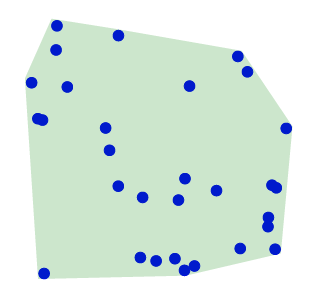

数学语言定义如下：


$$
\operatorname{conv}(X)=\left\{\sum_{n=1}^{N} \alpha_{n} x_{n}\right\} \quad \text { with } \quad \sum_{n=1}^{N} \alpha_{n}=1 \quad \text { and } \quad \alpha_{n} \geqslant 0
$$

如果数据点中的 positive class 和 negative class 被分开的话， 那么他们对应的凸包不会重合。 

参考下图：

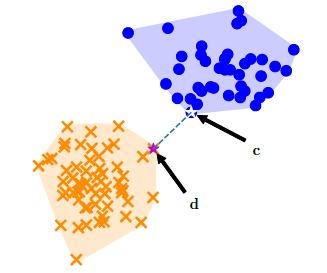

我们把训练数据 $(x_1, y_1), ..., (x_N, y_N)$ 中的 positive example 和 negative example 分开， 构建两个凸包。从 positive example 的凸包上选取离 negative class distribution 最近的一点 $c$； 同样地， 从 negative example 的凸包上选取离 positive class distribution 最近的一点 $d$。 并且定义 $w$ 为 $c$ 和 $d$ 的差：

$$w = c- d$$

我们想 $c$ 和 $d$ 尽可能靠近，所以我们的目标函数相当于是最小化 $\|w\|$:

$$
\arg \min _{w}\|w\|=\arg \min _{w} \frac{1}{2}\|w\|^{2}
$$

因为 $c$ 处于 positive examples 定义的凸包中， 所以有：

$$
c=\sum_{n: y_{n}=+1} \alpha_{n}^{+} x_{n}
$$

同样地， 因为 $d$ 处于 negative examples 定义的凸包中， 所以有：

$$
d=\sum_{n: y_{n}=-1} \alpha_{n}^{-} x_{n}
$$

代入目标函数有：

$$
\min _{\alpha} \frac{1}{2}\left\|\sum_{n: y_{n}=+1} \alpha_{n}^{+} x_{n}-\sum_{n: y_{n}=-1} \alpha_{n}^{-} x_{n}\right\|^{2}
$$

同时根据 $\sum_{n: y_{n}=+1} \alpha_{n}^{+}=1 \quad$ and $\quad \sum_{n: y_{n}=-1} \alpha_{n}^{-}=1$， 我们可以得到约束条件：

$$\sum_{n=1}^{N} y_{n} \alpha_{n}=0$$

再加上约束条件 $\alpha \ge 0$, 我们可以定义以下 constrained convex 优化问题 ：

$$
\begin {array}{cl}
\min _{\alpha} &\frac{1}{2}\left\|\sum_{n: y_{n}=+1} \alpha_{n}^{+} x_{n}-\sum_{n: y_{n}=-1} \alpha_{n}^{-} x_{n}\right\|^{2} \\
\text{subject to} & \sum_{n=1}^{N} y_{n} \alpha_{n}=0 \\
& \alpha \ge 0
\end{array}
$$

可以证明上面的问题和之前的 dual hard margin SVM 是一样的。 

## 12.4 Kernels

在 dual SVM 中， 目标函数中的内积只包括 $x_i, x_j$， 并没有数据点和参数的内积。 所以如果我们考虑用一组特征 $\phi(x_i)$ 来表示 $x_i$ 的话， 只需在内积那里替换掉 $x_i, x_j$ 就行了。 本小节介绍 kernel 的思想和 feature representation $\phi(x_i)$。 

因为 $\phi(x_i)$ 可以是 non-linear 函数， 我们可以用 SVM （线性分类器） 实现对数据的非线性分类。 

我们是可以先求 $\phi(x_i)$ 和 $\phi(x_j)$， 然后再求 $\langle \phi(x_i), \phi(x_j)\rangle$ 的， 但是这样做有以下缺点：
* 如果输入数据维度太大的话，这种方式的计算量会大大增大

所以为了解决这个问题我们引入核函数的概念。 
对于 $x_i, x_j$, 我们定义一个 similarity function $k(x_i, x_j)$, 这些 similarity functions 叫做 kernels， 他们 implicitly 定义了一个 非线性feature map $\phi(\cdot)$。 

kernel 是一种函数 $k: \mathcal{X} \times \mathcal{X} \rightarrow \mathbb{R}$，存在一个希尔伯特空间 $\mathcal{H}$ 和 feature map $\phi(\cdot)$ 满足：

$$k\left(x_{i}, x_{j}\right)=\left\langle \phi \left(x_{i}\right),\phi\left(x_{j}\right)\right\rangle_{\mathcal{H}}$$

每一个 kernel $k$ 都有一个与之相联系的再生核希尔伯特空间， 在这种唯一的对应关系中， $\phi(x) = k(\cdot, x)$ 被叫做 canonical feature map。 这种从内积到核函数的 generalization 叫做 kernel trick。 

把核函数 $k(\cdot, \cdot)$ 输出的结果 $K\in \mathbb{R}^{N\times N}$ 叫做 Gram matrix，也被称为 kernel matrix。 核函数得是对称和半正定的，才能保证 kernel matrix $K$ 是对称和半正定的。 

$$
\forall z \in \mathbb{R}^{N}: z^{\top} K z \geqslant 0
$$

设计核函数的主要目的就是为了降低两个 feature map 内积相乘时的计算量。

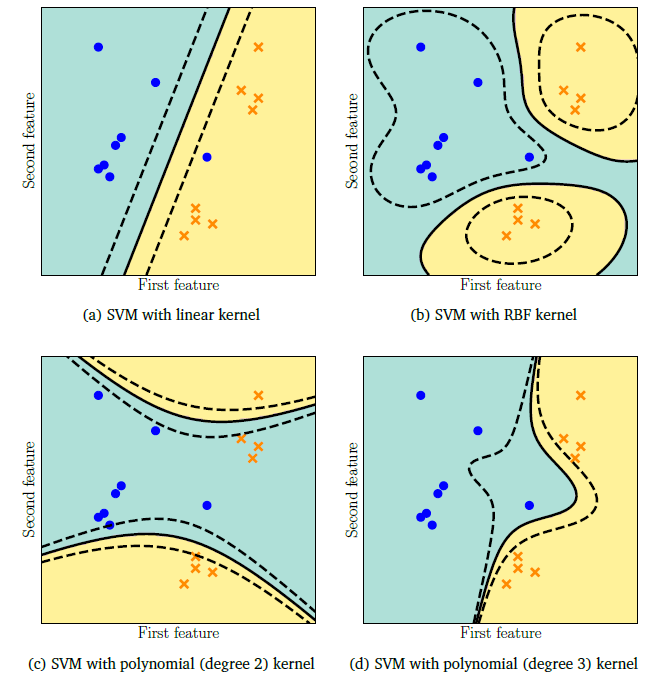

 

## 12.5 Numerical Solution

本小节提供两种找 SVM 最优解的方法： 
1. Loss view
2. Quadratic programs

先看 loss view 方法：

在前面 loss function view 部分， 我们有以下目标函数：

$$
\min _{w, b} \frac{1}{2}\|\boldsymbol{w}\|^{2} + C \sum_{n=1}^{N} \max \left\{0,1-y_{n}\left(\left\langle w, x_{n}\right\rangle+b\right)\right\}
$$

这是一个 convex unconstrained optimization problem， 但是 hinge loss 无法微分。 所以我们采用 subgraident approach：

$$
g(t)=\left\{\begin{array}{ll}
-1 & t<1 \\
{[-1,0]} & t=1 \\
0 & t>1
\end{array}\right.
$$

其中 $g$ 是 hinge loss 的 subgradient。 根据 $g(t)$ 我们就可以求解上述问题了。 

Quadratic programs: 

前面 geometric view 部分， 我们把 SVM 问题定义如下：

$$
\begin{array}{cl}
\min _{w, b, \xi} & \frac{1}{2}\|w\|^{2}+C \sum_{n=1}^{N} \xi_{n} \\
\text { subject to } & y_{n}\left(\left\langle w, x_{n}\right\rangle+b\right) \geqslant 1-\xi_{n} \\
& \xi_{n} \geqslant 0
\end{array}
$$

这里我们把点积当作内积，问题可以整理如下：

$$
\begin{array}{l}
\min _{w, b, \xi} &\frac{1}{2}\|w\|^{2}+C \sum_{n=1}^{N} \xi_{n} \\
\text{subject to} &\quad-\xi_{n} \leqslant 0 \\
&\quad-y_{n} x_{n}^{\top} w-y_{n} b-\xi_{n} \leqslant-1
\end{array}
$$

把 $w, b, x_n$ 合成一个向量， 我们有：

$$
\begin{array}{cl}
\min _{\boldsymbol{w}, b, \boldsymbol{\xi}} &\quad \frac{1}{2}\left[\begin{array}{c}
\boldsymbol{w} \\
b \\
\boldsymbol{\xi}
\end{array}\right]^{\top}\left[\begin{array}{cc}
\boldsymbol{I}_{D} & \mathbf{0}_{D, N+1} \\
\mathbf{0}_{N+1, D} & \boldsymbol{0}_{N+1, N+1}
\end{array}\right]\left[\begin{array}{l}
\boldsymbol{w} \\
b \\
\boldsymbol{\xi} \\
\end{array}\right]
+\left[\begin{array}{ll}
0_{D+1,1} & C 1_{N, 1}
\end{array}\right]^{\top}\left[\begin{array}{l}
w \\
b \\
\xi
\end{array}\right] \\
\text { subject to } &\left[\begin{array}{ccc}
-Y X & -y & -I_{N} \\
0_{N, D+1} & -I_{N}
\end{array}\right]\left[\begin{array}{l}
w \\
b \\
\xi
\end{array}\right] \leqslant\left[\begin{array}{c}
-1_{N, 1} \\
0_{N, 1}
\end{array}\right]
\end{array}
$$

把 dual SVM 化为 Quadratic program 的标准形式有：

$$
\begin{array}{l}
\min _{\alpha} \frac{1}{2} \alpha^{\top} Y K Y \alpha-1_{N, 1}^{\top} \alpha \\
\text { subject to } \quad\left[\begin{array}{c}
y^{\top} \\
-y^{\top} \\
-I_{N} \\
I_{N}
\end{array}\right] \alpha \leqslant\left[\begin{array}{l}
0_{N+2,1} \\
C 1_{N, 1}
\end{array}\right] .
\end{array}
$$